In [1]:
from scgenome.simulation import many_poisson_bicluster, do_naive_hc, \
    pairwise_distance
from treeswift.Tree import read_tree_linkage

OUTPUT_FP = "/Users/massoudmaher/data/pois_ran_walk.json"
#OUTPUT_FP = "/work/shah/maherm/100t_pois_ran_walk.json"
TRIALS_PER_SET = 1
SAMPLES_PER_CLUSTER = [8]
NUM_BIN = [100, 500]
MAX_CN = [4]
#ALPHA = [0.01, 0.05, 0.3, 0.6, 0.9]
ALPHA = [0.01, 0.6, 0.9]
INIT_LAMBDAS = [(3, 1)]
JUMP_LAMBDAS = [(1, 0.1)]


def plinkage_to_tree(plinkage):
    cols = ["i", "j", "dist", "merge_count"]
    linkage = plinkage.loc[:, cols].to_numpy().astype("float")
    return read_tree_linkage(linkage)


print("Starting simulations")
sims = many_poisson_bicluster(TRIALS_PER_SET, SAMPLES_PER_CLUSTER, NUM_BIN,
                              MAX_CN, ALPHA, INIT_LAMBDAS, JUMP_LAMBDAS,
                              num_cores=8)
do_naive_hc(sims, "cityblock")

sims["naive_tree"] = sims["naive_linkage"].apply(read_tree_linkage)
sims["bhc_tree"] = sims["plinkage"].apply(plinkage_to_tree)
sims["naive_pwd"] = sims["naive_tree"].apply(pairwise_distance)
sims["bhc_pwd"] = sims["bhc_tree"].apply(pairwise_distance)

sims = sims.drop(columns=["naive_tree"])
sims = sims.drop(columns=["bhc_tree"])
sims.to_json(OUTPUT_FP)

Starting simulations
[########################################] | 100% Completed |  9.0s


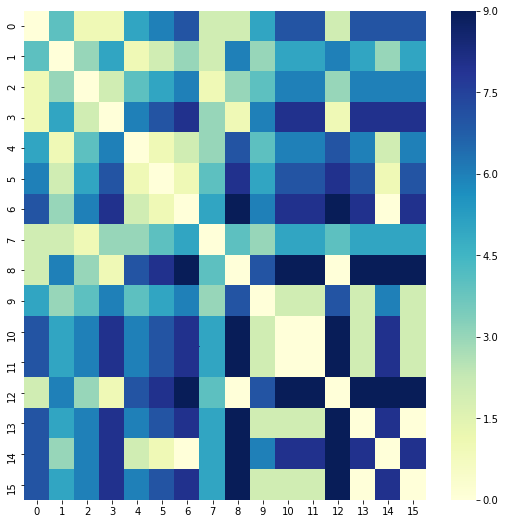

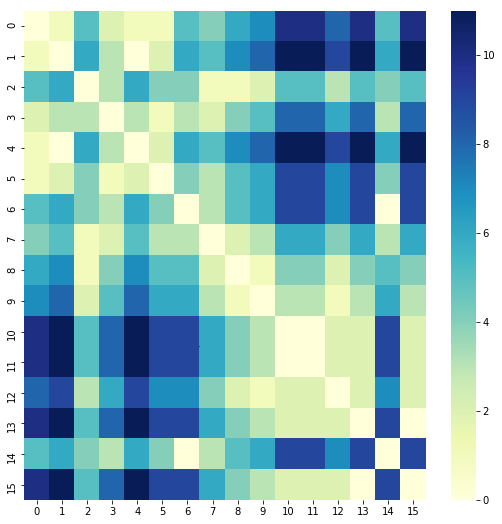

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

bhc_eg_pwd = sims["bhc_pwd"][0]
naive_eg_pwd = sims["naive_pwd"][0]

fig = plt.figure(figsize=(9,9))
sns.heatmap(bhc_eg_pwd, cmap="YlGnBu")

fig = plt.figure(figsize=(9,9))
sns.heatmap(naive_eg_pwd, cmap="YlGnBu")
#ax = plt.imshow(bhc_eg_pwd)
#ax = plt.gca()
#ax = ax.set_xticks(range(bhc_eg_pwd.shape[0]))
#ax = ax.set_yticks(range(bhc_eg_pwd.shape[0]))